In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import sqlite3
import seaborn as sns
import numpy as np

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [262]:
#stationbikes + yelpresto using merge to show bikestations and nearby resto
#importing resto excel
restos = pd.read_excel('files/restaurants.xlsx', sheet_name= 'restaurants', engine = 'openpyxl')
restos['city'] = 'London'#I add the city so that I use it in merging
restos

,resto_name,review_count,rating,latitude,longitude,is_closed,distance,city
0,The Ledbury,173,4.6,51.516819,-0.200107,False,4458.536864,London
1,Dishoom,729,4.6,51.513087,-0.139767,False,262.732936,London
2,Blacklock,150,4.6,51.511687,-0.134762,False,162.359136,London
3,Dishoom,2556,4.5,51.512447,-0.126958,False,626.567432,London
4,Flat Iron,480,4.5,51.512120,-0.138401,False,186.272039,London
5,The Mayfair Chippy,510,4.5,51.513134,-0.153396,False,1205.537933,London
6,Burger & Lobster,114,4.5,51.501441,-0.159432,False,2066.044802,London
7,Hawksmoor Seven Dials,398,4.4,51.513500,-0.125674,False,715.805011,London
8,Dinner by Heston Blumenthal,312,4.4,51.502163,-0.159966,False,2047.209028,London
9,Petrus,135,4.4,51.499367,-0.156520,False,2065.043045,London


In [263]:
#importing stationbikes excel
bike_stations = pd.read_excel('files/stations.xlsx', sheet_name= 'stations', engine = 'openpyxl')
bike_stations['city'] = 'London'#I add the city so that I use it in merging
bike_stations

,Unnamed: 0,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp,city
0,0,10,"{'installDate': '1278947280000', 'installed': ...",9,7f3020118e56165ed8b2f61899edb971,51.529163,-0.109971,"001023 - River Street , Clerkenwell",2024-05-12T19:20:53.248000Z,London
1,1,15,"{'installDate': '1278585780000', 'installed': ...",22,67e6c16bce05410ba4b1f0f5000726ea,51.499607,-0.197574,"001018 - Phillimore Gardens, Kensington",2024-05-12T19:20:53.256000Z,London
2,2,14,"{'installDate': '1278242460000', 'installed': ...",3,26184215d38089fcad213ef222e69780,51.505974,-0.092754,"001024 - Park Street, Bankside",2024-05-12T19:20:53.424000Z,London
3,3,19,"{'installDate': '1278340440000', 'installed': ...",4,1eabd7ac8e781befd03f52ef56a18aa7,51.523951,-0.122502,"001022 - Brunswick Square, Bloomsbury",2024-05-12T19:20:53.440000Z,London
4,4,42,"{'installDate': '1278340620000', 'installed': ...",4,23efb32f80a9dcd0e4f61fb44b353ce1,51.521681,-0.130432,"000980 - Malet Street, Bloomsbury",2024-05-12T19:20:53.441000Z,London
...,...,...,...,...,...,...,...,...,...,...
787,787,18,"{'installDate': '1279885320000', 'installed': ...",0,2db775eff9ba5222e5c53580d025782b,51.510048,-0.138846,"001197 - Sackville Street, Mayfair",2024-05-12T19:20:54.046000Z,London
788,788,20,"{'installDate': '1384968480000', 'installed': ...",14,8ecc337dd1950c019e8d01e27c886e23,51.536425,-0.054162,"300011 - Victoria Park Road, Hackney Central",2024-05-12T19:20:55.046000Z,London
789,789,14,"{'installDate': '1296125400000', 'installed': ...",7,4199b8128833a99369bc72178ed8721b,51.506864,-0.150667,"003506 - Stanhope Gate, Mayfair",2024-05-12T19:20:54.171000Z,London
790,790,19,"{'installDate': '1279291500000', 'installed': ...",0,51acbe456158a598628a833232e6e2a2,51.491212,-0.173716,"001124 - Sumner Place, South Kensington",2024-05-12T19:20:53.743000Z,London


In [264]:
#merging both resto and bikestations on 'id'
london_stations= pd.merge(restos, bike_stations, on='city', how='outer')
london_stations


,resto_name,review_count,rating,latitude_x,longitude_x,is_closed,distance,city,Unnamed: 0,empty_slots,extra,free_bikes,id,latitude_y,longitude_y,name,timestamp
0,The Ledbury,173,4.6,51.516819,-0.200107,False,4458.536864,London,0,10,"{'installDate': '1278947280000', 'installed': ...",9,7f3020118e56165ed8b2f61899edb971,51.529163,-0.109971,"001023 - River Street , Clerkenwell",2024-05-12T19:20:53.248000Z
1,The Ledbury,173,4.6,51.516819,-0.200107,False,4458.536864,London,1,15,"{'installDate': '1278585780000', 'installed': ...",22,67e6c16bce05410ba4b1f0f5000726ea,51.499607,-0.197574,"001018 - Phillimore Gardens, Kensington",2024-05-12T19:20:53.256000Z
2,The Ledbury,173,4.6,51.516819,-0.200107,False,4458.536864,London,2,14,"{'installDate': '1278242460000', 'installed': ...",3,26184215d38089fcad213ef222e69780,51.505974,-0.092754,"001024 - Park Street, Bankside",2024-05-12T19:20:53.424000Z
3,The Ledbury,173,4.6,51.516819,-0.200107,False,4458.536864,London,3,19,"{'installDate': '1278340440000', 'installed': ...",4,1eabd7ac8e781befd03f52ef56a18aa7,51.523951,-0.122502,"001022 - Brunswick Square, Bloomsbury",2024-05-12T19:20:53.440000Z
4,The Ledbury,173,4.6,51.516819,-0.200107,False,4458.536864,London,4,42,"{'installDate': '1278340620000', 'installed': ...",4,23efb32f80a9dcd0e4f61fb44b353ce1,51.521681,-0.130432,"000980 - Malet Street, Bloomsbury",2024-05-12T19:20:53.441000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,Petrus,135,4.4,51.499367,-0.156520,False,2065.043045,London,787,18,"{'installDate': '1279885320000', 'installed': ...",0,2db775eff9ba5222e5c53580d025782b,51.510048,-0.138846,"001197 - Sackville Street, Mayfair",2024-05-12T19:20:54.046000Z
7916,Petrus,135,4.4,51.499367,-0.156520,False,2065.043045,London,788,20,"{'installDate': '1384968480000', 'installed': ...",14,8ecc337dd1950c019e8d01e27c886e23,51.536425,-0.054162,"300011 - Victoria Park Road, Hackney Central",2024-05-12T19:20:55.046000Z
7917,Petrus,135,4.4,51.499367,-0.156520,False,2065.043045,London,789,14,"{'installDate': '1296125400000', 'installed': ...",7,4199b8128833a99369bc72178ed8721b,51.506864,-0.150667,"003506 - Stanhope Gate, Mayfair",2024-05-12T19:20:54.171000Z
7918,Petrus,135,4.4,51.499367,-0.156520,False,2065.043045,London,790,19,"{'installDate': '1279291500000', 'installed': ...",0,51acbe456158a598628a833232e6e2a2,51.491212,-0.173716,"001124 - Sumner Place, South Kensington",2024-05-12T19:20:53.743000Z


In [265]:
# I only keep columns that carry information I need in order to clean the dataframe some more.
#(resto_name, review_count, rating, city, empty_slots, free_bikes, latitude, longitude, name, timestamp)
columns_to_keep = ['resto_name', 'review_count', 'rating', 'city', 
                   'empty_slots', 'free_bikes',  'name', 'timestamp']

# Drop columns that are not in the list of columns to keep
london_stations = london_stations[columns_to_keep]

# Print the updated DataFrame
london_stations

,resto_name,review_count,rating,city,empty_slots,free_bikes,name,timestamp
0,The Ledbury,173,4.6,London,10,9,"001023 - River Street , Clerkenwell",2024-05-12T19:20:53.248000Z
1,The Ledbury,173,4.6,London,15,22,"001018 - Phillimore Gardens, Kensington",2024-05-12T19:20:53.256000Z
2,The Ledbury,173,4.6,London,14,3,"001024 - Park Street, Bankside",2024-05-12T19:20:53.424000Z
3,The Ledbury,173,4.6,London,19,4,"001022 - Brunswick Square, Bloomsbury",2024-05-12T19:20:53.440000Z
4,The Ledbury,173,4.6,London,42,4,"000980 - Malet Street, Bloomsbury",2024-05-12T19:20:53.441000Z
...,...,...,...,...,...,...,...,...
7915,Petrus,135,4.4,London,18,0,"001197 - Sackville Street, Mayfair",2024-05-12T19:20:54.046000Z
7916,Petrus,135,4.4,London,20,14,"300011 - Victoria Park Road, Hackney Central",2024-05-12T19:20:55.046000Z
7917,Petrus,135,4.4,London,14,7,"003506 - Stanhope Gate, Mayfair",2024-05-12T19:20:54.171000Z
7918,Petrus,135,4.4,London,19,0,"001124 - Sumner Place, South Kensington",2024-05-12T19:20:53.743000Z


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [232]:
#contex: I want to see the top ten nearby recommendable restaurants and nearby slots and: empty_slots, free_bikes, name, rating
#I will edit the londonstations dataframe only to include the needed columns. This helps me view this dataframe better
needed_columns = ['resto_name', 'review_count', 'rating',
                   'empty_slots', 'free_bikes']
stations_v = londonstations[needed_columns]
stations_view= stations_v.rename(columns={'name': 'slot_address'})

stations_view


,resto_name,review_count,rating,empty_slots,free_bikes
0,The Ledbury,173,4.6,10,9
1,The Ledbury,173,4.6,15,22
2,The Ledbury,173,4.6,14,3
3,The Ledbury,173,4.6,19,4
4,The Ledbury,173,4.6,42,4
...,...,...,...,...,...
7915,Petrus,135,4.4,18,0
7916,Petrus,135,4.4,20,14
7917,Petrus,135,4.4,14,7
7918,Petrus,135,4.4,19,0


In [233]:
# Grouping by restaurant names and aggregating data
unique_restos= stations_view.groupby('resto_name').agg({
    'review_count': 'mean',
    'rating': 'mean',
    'empty_slots': 'sum',
    'free_bikes': 'sum'
}).reset_index()

unique_restos



,resto_name,review_count,rating,empty_slots,free_bikes
0,Blacklock,150.0,4.60,11016,8963
1,Burger & Lobster,114.0,4.50,11016,8963
2,Dinner by Heston Blumenthal,312.0,4.40,11016,8963
3,Dishoom,1642.5,4.55,22032,17926
4,Flat Iron,480.0,4.50,11016,8963
5,Hawksmoor Seven Dials,398.0,4.40,11016,8963
6,Petrus,135.0,4.40,11016,8963
7,The Ledbury,173.0,4.60,11016,8963
8,The Mayfair Chippy,510.0,4.50,11016,8963


In [234]:
#I will use 'free_bikes' as a target variable . This viarable measures number of bikes around restaurnats in comparison with other variables
#I give both review_count and rate_percent same importance. So, I'll use them to get a common scale
unique_restos['rate_percent'] = (unique_restos['rating'] * 100)/5
unique_restos['performance'] = (unique_restos['review_count'] * unique_restos['rate_percent'])/2
unique_restos

,resto_name,review_count,rating,empty_slots,free_bikes,rate_percent,performance
0,Blacklock,150.0,4.60,11016,8963,92.0,6900.00
1,Burger & Lobster,114.0,4.50,11016,8963,90.0,5130.00
2,Dinner by Heston Blumenthal,312.0,4.40,11016,8963,88.0,13728.00
3,Dishoom,1642.5,4.55,22032,17926,91.0,74733.75
4,Flat Iron,480.0,4.50,11016,8963,90.0,21600.00
5,Hawksmoor Seven Dials,398.0,4.40,11016,8963,88.0,17512.00
6,Petrus,135.0,4.40,11016,8963,88.0,5940.00
7,The Ledbury,173.0,4.60,11016,8963,92.0,7958.00
8,The Mayfair Chippy,510.0,4.50,11016,8963,90.0,22950.00


In [235]:
#for future use, I will export unique_restos as excel
unique_res= unique_restos.to_excel("unique_resto.xlsx", sheet_name="unique_resto")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

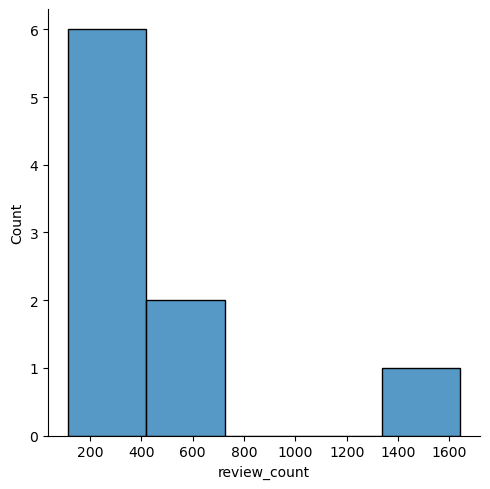

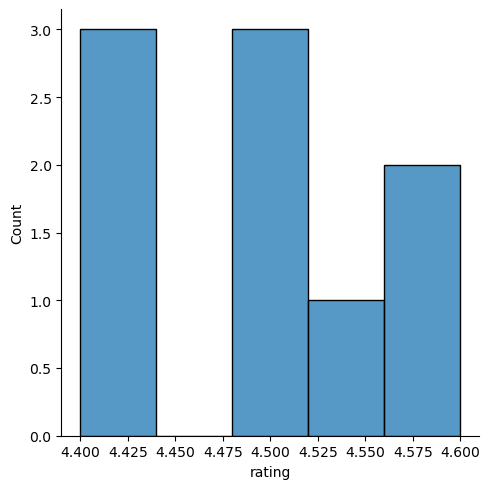

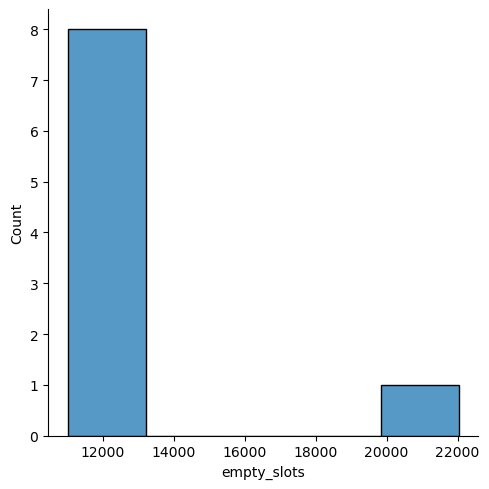

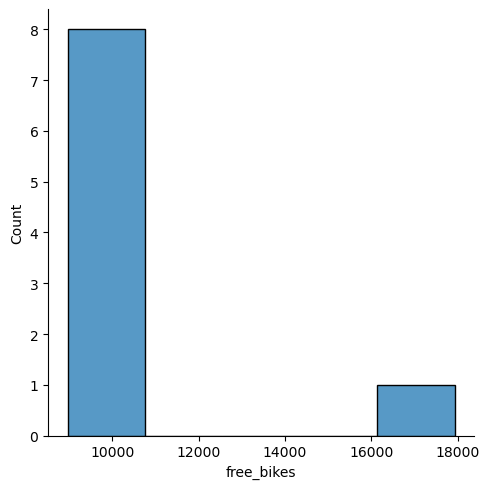

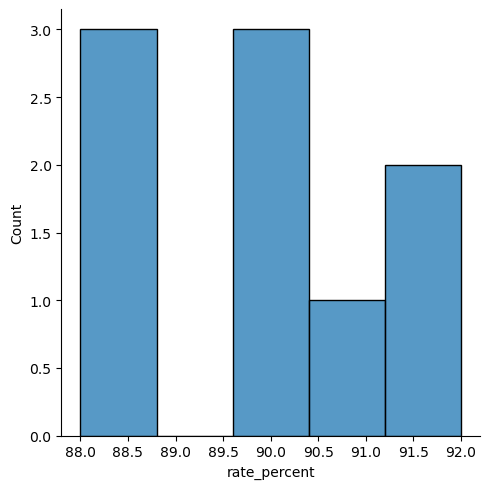

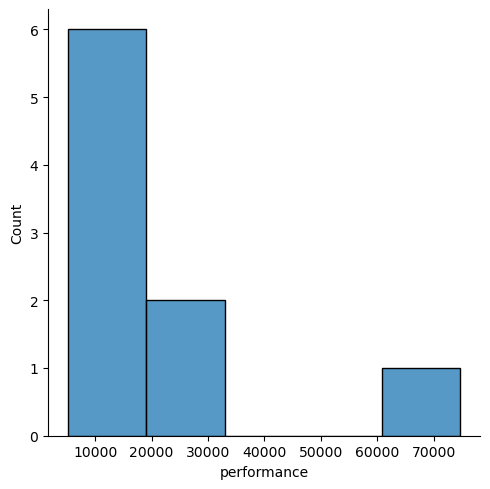

In [236]:
#EDA I visualize distribution analysis of all columns in the dataset
cols = unique_restos.dtypes[unique_restos.dtypes != 'object'].index.tolist()

for column in cols: 
    sns.displot(unique_restos[column])

In [ ]:
#Even though there seem to be not much outliers, there is unequal distribution across the column

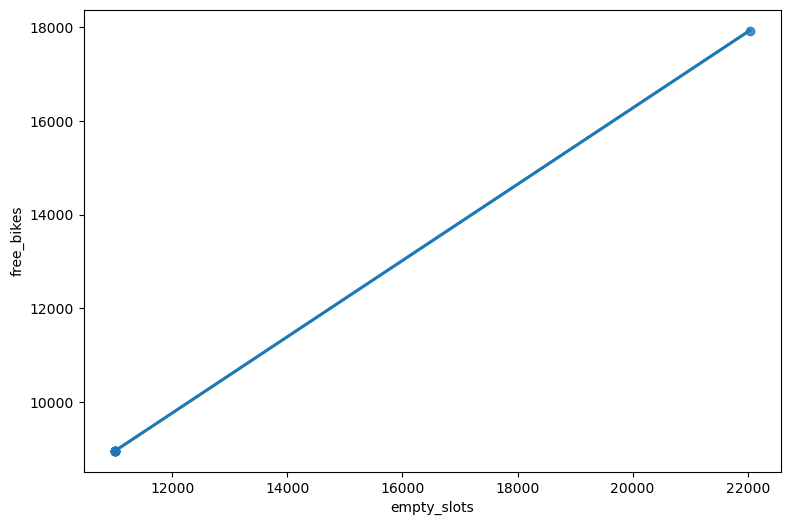

In [213]:
#This regression plot analyses both empty slots and performance in relation to number of free_bikes near restaurants. We can see that empty slots does have more
#relationship compared to performance. We will visualize this further in the heatmap to see if we can make an informed insight
f, ax = pl.subplots(figsize=(9, 6))
sns.regplot(x=(unique_restos['empty_slots']), y=unique_restos['free_bikes'], data=unique_restos, order=1); 

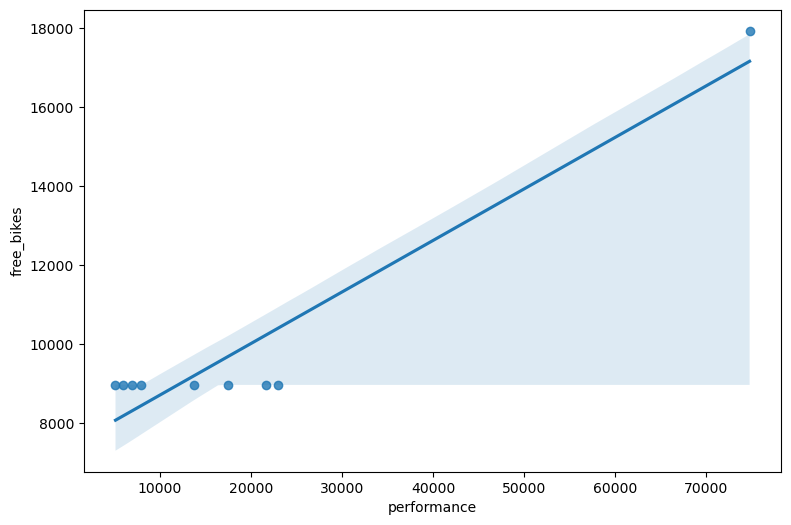

In [212]:
f, ax = pl.subplots(figsize=(9, 6))
sns.regplot(x=(unique_restos['performance']), y=unique_restos['free_bikes'], data=unique_restos, order=1);

<Axes: >

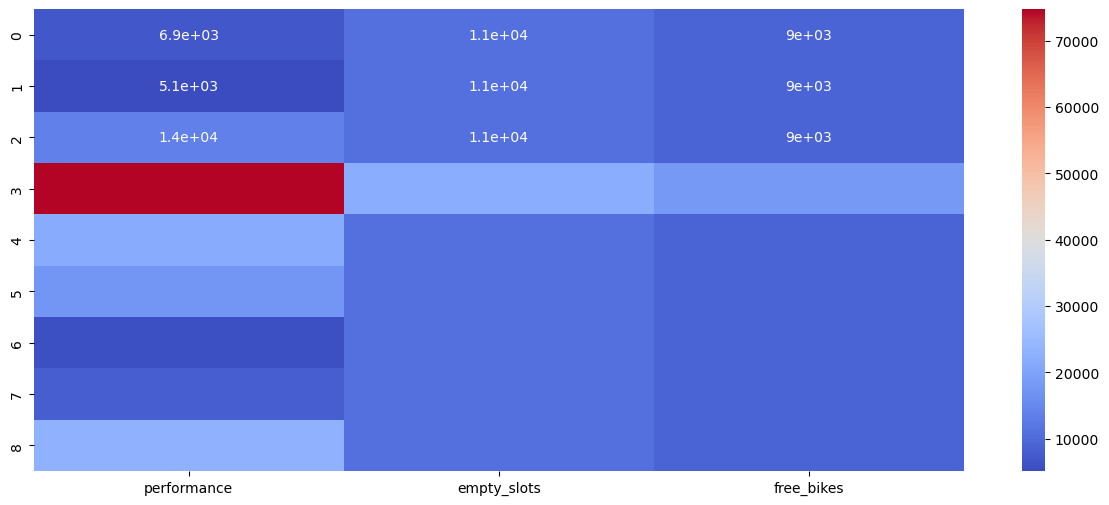

In [223]:
selected_col =['performance',  'empty_slots', 'free_bikes']
df = unique_restos[selected_col]
pl.figure(figsize=(15, 6))
sns.heatmap(df, annot=True, cmap='coolwarm')
#This heat map reveals overall similar performance of restaurants.
#Even if we look at the empty slots, performance, and free bikes around the 
#restaurants the numbers are pretty average. However, there is a presence of outlier 
#(there is a restaurant that may be performing better than others)
#which also affects presence of many free bikes. This is crucial information to know in case any biker would want to go to that area. 

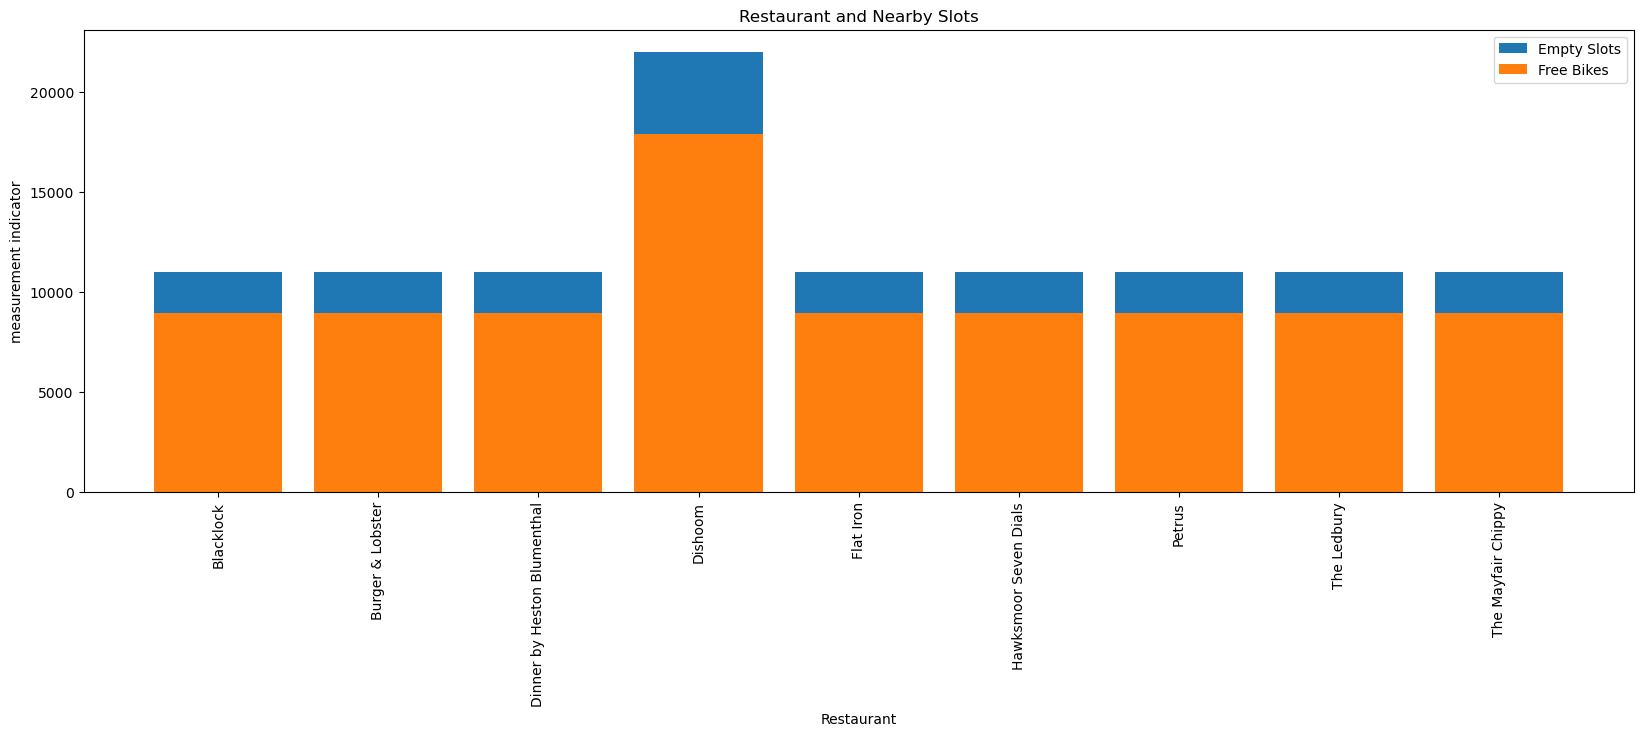

In [224]:
# Plotting
pl.figure(figsize=(20, 6))

# Define x-axis values
x = unique_restos['resto_name']


# Plot empty slots
pl.bar(x, unique_restos['empty_slots'], label='Empty Slots')

# Plot free bikes
pl.bar(x, unique_restos['free_bikes'],  label='Free Bikes')

# Adding labels and title
pl.xlabel('Restaurant')
pl.ylabel('measurement indicator')
pl.title('Restaurant and Nearby Slots')
pl.xticks(rotation=90)
pl.legend()

#This bar chart also shows us that both free bikes and empty slots near the restaurant are almost equally distributed, but Dishoom restaurant have more compared
#to other restaurants

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [290]:
#A sqlite connection
db_conn = sqlite3.connect('sqldb/bikes_and_poi.db')

# Store 2 joined df in the db: londonstations, stations_view
londonstations.to_sql('stations_table', db_conn, if_exists='replace', index=False, )
# Store dataframe  in the database
stations_view.to_sql('restos_table', db_conn, if_exists='replace', index=False, )

db_conn.close()


Look at the data before and after the join to validate your data.

In [291]:
conn = sqlite3.connect('sqldb/bikes_and_poi.db')
df = pd.read_sql_query("SELECT * FROM stations_table", conn)